# MVP with Markowitz Mean-Variance Optimization model

**Overview**<br><br>
The task involves optimizing a portfolio of stocks to achieve the highest expected return for a given level of risk. This is done using the Markowitz Mean-Variance Optimization model. The code will calculate the efficient frontier and identify the Minimum Variance Portfolio (MVP) using the Gurobi optimization library.
<br>

*Generating Correlation Matrix*:<br> 
Ensuring accurate representation and calculation to reflect realistic correlations between different stocks.<br>
*Creating Covariance Matrix*:<br>
Accurate calculation is crucial as it impacts portfolio optimization results.<br>
*Optimization Process*:<br>
Ensuring constraints are met while optimizing for minimum risk or maximum return.<br>


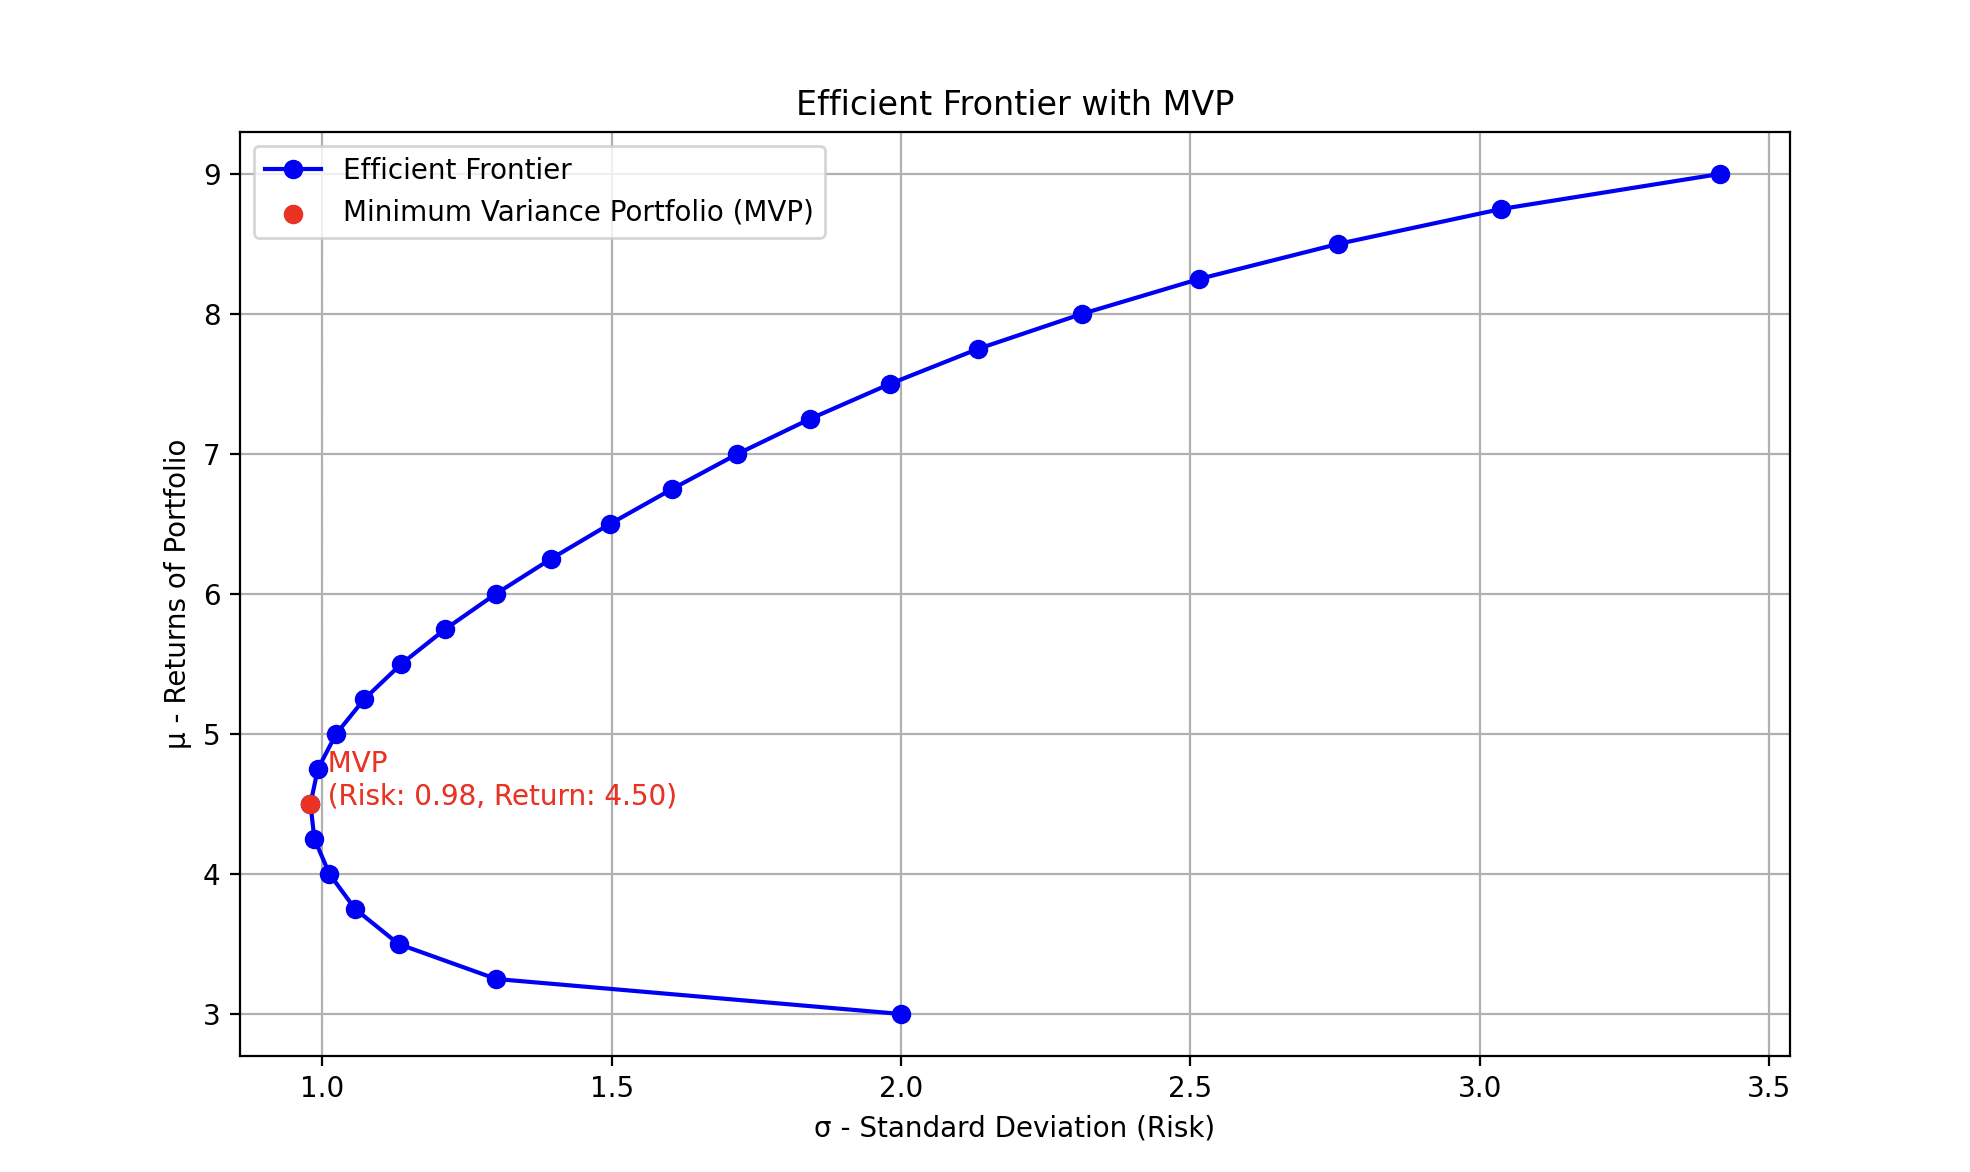

## Image Explaination <br>
The efficient frontier shows an upward trend indicating that higher returns are associated with higher risks. The Minimum Variance Portfolio (MVP) provides investors with an option where they can get reasonable returns at minimized risks; it’s often considered by conservative investors.
<br>
The plot shows the efficient frontier (blue line) and the MVP (red dot). The efficient frontier represents various portfolios offering different levels of returns for associated risks. The MVP indicates the portfolio with the minimum risk (0.98) and its associated return (4.50).
<br>

# Code Explaination

## Importing necessary libraries <br>
The code begins by importing the necessary Python libraries such as Gurobi for optimization, NumPy for numerical operations, and Matplotlib for plotting.<br>

```python
import gurobipy as gp
from gurobipy import Model, GRB
from math import sqrt
import numpy as np  
import random
import matplotlib.pyplot as plt
```

## Initializing parameters <br>
The code then initializes some parameters related to the stocks, such as the number of stocks and some dummy variables.
<br>

```python
num_stocks = 8
d1 = 1 
d2 = 4 
dummy_step = 10*d1+d2
```
<br>

## Generating Correlation Matrix <br>
The code generates a correlation matrix that represents the correlation coefficients between the returns of the stocks.
<br>
```python
corr_matrix = np.array([[0]*num_stocks for _ in range(num_stocks)], dtype = float)
for i in range(num_stocks):
    for j in range(num_stocks):
        corr_matrix[i][j] = (-1)**abs(i-j)/(abs(i-j)+1)
```
<br>

## Generate sigma and mu vectors <br>
Sigma (standard deviation) and mu (expected return) vectors for the stocks are generated. These vectors are crucial in portfolio optimization as they represent the risk and return of the stocks.
<br>

```python
sigma_vector = np.zeros((num_stocks, 1))
mu_vector = np.zeros((num_stocks, 1))
sigma_vector[0] = 2
mu_vector[0] = 3

for i in range(1, num_stocks):
    sigma_vector[i] = sigma_vector[i-1] + 2*random.uniform(0,1)
    mu_vector[i] = mu_vector[i-1] + 1


sigma_diag = np.diagflat(sigma_vector)
```

<br>

## Creating covariance matrix <br>
Using the correlation matrix and the sigma vector, the code generates the covariance matrix. This matrix is used in the calculation of the portfolio risk.
<br>
```python
cov_matrix_temp = sigma_diag @ corr_matrix @ sigma_diag
cov_matrix = 0.5*(cov_matrix_temp + cov_matrix_temp.T)
```
<br>

## Setting Return Values <br>
The code sets a range of expected return values for which the portfolio risk will be minimized.
<br>
```python
r_values = np.arange(3.00, 9.25, 0.25)

risk_values = []
return_values = []
```
<br>

## Optimization for each return <br>
For each expected return value, the code optimizes the portfolio using Gurobi. It sets up the optimization problem, adds the necessary constraints, and solves the problem to find the portfolio composition that minimizes the risk.
<br>
```python
for r in r_values:
    model = Model('portfolio')

    # Addition of matrix variable for the stocks
    x = model.addMVar(num_stocks)

    # Portfolio risk (squared) using the covariance matrix
    portfolio_risk = x @ cov_matrix @ x
    model.setObjective(portfolio_risk, GRB.MINIMIZE)

    # Fix budget with an equality constraint
    model.addConstr(x.sum() == 1, 'budget')

    # Constraint for expected return
    model.addConstr(mu_vector.T @ x == r, 'expected_return')

    # Add non-negativity constraints using list comprehension
    [model.addConstr(x[j] >= 0, f'non_negativity_{j}') for j in range(num_stocks)]

    # Optimizingn the model
    model.optimize()

    # Calculating σ (risks) and μ (returns) for the optimized portfolio
    risk_values.append(sqrt(portfolio_risk.getValue()))
    return_values.append(r)
```
<br>

## Finding the Minimum Risk Portfolio <br>
The code identifies the portfolio with the minimum risk across all optimized portfolios.
<br>
```python
min_risk_index = risk_values.index(min(risk_values))
min_risk_sigma = risk_values[min_risk_index]
min_risk_return = return_values[min_risk_index]
```
<br>

## Plotting the Results <br>
Finally, the code plots the efficient frontier and the minimum variance portfolio on a graph.
<br>
```python
plt.figure(figsize=(10, 6))
plt.plot(risk_values, return_values, marker='o', color='blue', label='Efficient Frontier')
plt.scatter(min_risk_sigma, min_risk_return, color='red', label='Minimum Variance Portfolio (MVP)', zorder=5)
plt.text(min_risk_sigma, min_risk_return, f'  MVP\n  (Risk: {min_risk_sigma:.2f}, Return: {min_risk_return:.2f})', color='red')
plt.title('Efficient Frontier with MVP')
plt.xlabel('σ - Standard Deviation (Risk)')
plt.ylabel('μ - Returns of Portfolio')
plt.legend()
plt.grid(True)
plt.show()


# Output Explaination
<br>

The output is with Gurobi Optimizer, which is solving the portfolio optimization problem:
<br>

## Optimal Objective: <br>
The optimal value of the objective function, which in this case is the portfolio risk. The optimizer has found the portfolio composition that minimizes the risk for each expected return level. For example, for one of the runs, the minimum risk found is approximately 6.325, 7.589, and 9.224 for different expected returns.
<br> <br>

## Model Fingerprint: <br> 
This is a unique identifier for the model. It can be used to ensure that the model hasn’t changed between runs.
<br> <br>

## Barrier Statistics: <br>
These statistics are specific to the barrier method, which is a method for solving convex optimization problems. The barrier method is an interior-point method, which means it finds the optimal solution by traversing the interior of the feasible region.
<br>
- Free Vars: The number of free variables in the model. 
- AA’ NZ: The number of non-zeros in the normal matrix (A times A’).
- Factor NZ: The number of non-zeros in the factor of the normal matrix.
- Factor Ops: The number of floating-point operations required to factor the normal matrix.
<br> <br>

## Iterations: <br>
The optimizer goes through several iterations to find the optimal solution. In each iteration, it improves the current solution until it reaches the optimal one. The primal and dual columns show the objective value of the primal and dual problems at each iteration.
<br> <br>
## Presolve: <br>
This is a process that simplifies the optimization problem before solving it, which can make the problem easier to solve. The presolve time is the time taken for this process.
<br> <br>
## Coefficient Statistics:  <br>
These statistics provide information about the range of values in the model’s coefficients, which can be useful for understanding the model’s numerical properties.
<br> <br>

# 2nd Method

Previous, 
the constraint eTx=1 <br> 
It ensures that the entire capital is invested, i.e., the sum of the portfolio weights equals 1. This means that we are fully invested in the market.<br> 

Now, we are allowed to save a fraction of the capital without any return or any risk. 
It be modelled by changing the constraint to eTx≤1 <br> 
This allows the sum of the portfolio weights to be less than or equal to 1, meaning that we can choose not to invest the entire capital. The difference between 1 and the sum of the portfolio weights represents the fraction of the capital that is saved. <br>
The change in the constraint will affect the shape of the efficient frontier. <br> <br>
Previously, the efficient frontier is a curve that starts from the minimum variance portfolio and extends upwards. <br>
In this one, the efficient frontier will still be a curve for the risky investments, but it will extend as a horizontal line to the right from the minimum variance portfolio. This horizontal line represents portfolios that include savings. The return of these portfolios is the same as the return of the minimum variance portfolio, but their risk (standard deviation) is lower because a fraction of the capital is saved without any risk. <br> <br>


# Code Explaination

The overall code including: declarations, definitions, functions and plottings will be the same as shown previously. The only difference will be in budget. <br> <br>
In **Optimization for each return** part, we will change the value of budget from <br>
```python
model.addConstr(x.sum() == 1, 'budget')
```
<br>

to<br> <br>
```python
model.addConstr(x.sum() <= 1, 'budget')
```
<br> <br>

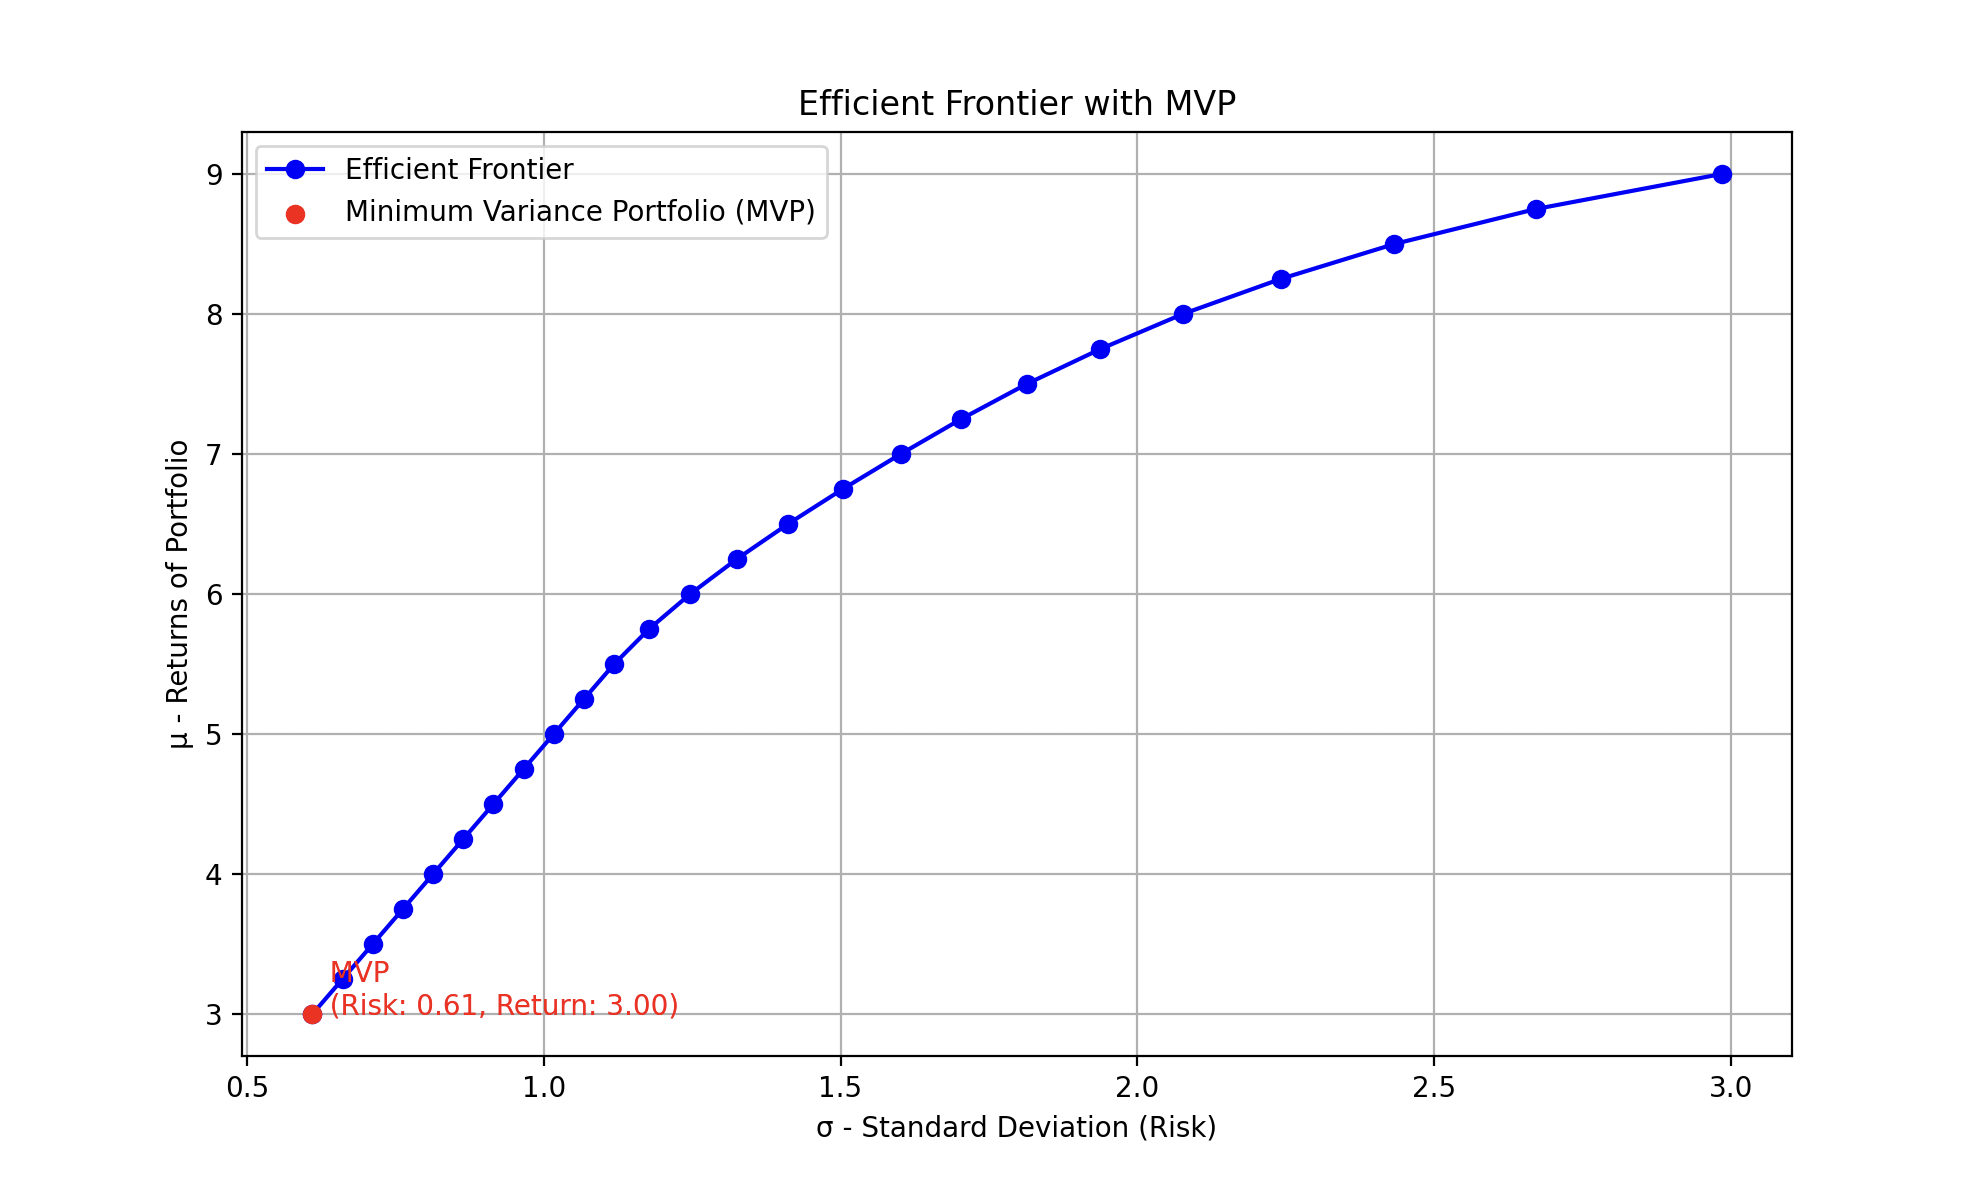

## Image Explaination <br> 
By changing the budget constraint in our code, we have allowed for the possibility of not investing the entire capital. This is reflected in the output image where the Efficient Frontier extends into a horizontal line to the right from the Minimum Variance Portfolio (MVP). This horizontal line represents portfolios that include savings. The return of these portfolios is the same as the return of the MVP, but their risk (standard deviation) is lower because a fraction of the capital is saved without any risk.

The plot shows the efficient frontier (blue line) and the MVP (red dot). The efficient frontier represents various portfolios offering different levels of returns for associated risks. The MVP indicates the portfolio with the minimum risk and its associated return. The horizontal line extending from the MVP to the right represents portfolios that include savings.
<br> <br>


# 3rd Method <br>

In 1st method, the constraint μTx=r 
It ensures that the expected return of the portfolio is exactly r. This means that the optimizer will find the portfolio with the minimum risk for exactly this level of return.
In this method, the constraint is changed to μTx≥r
This means that the expected return of the portfolio should be at least r. The optimizer will therefore find the portfolio with the minimum risk for a return that is at least r.

This change implies that the investor is not satisfied with a return that is exactly r but wants a return that is at least r. This could be the case if r is the minimum acceptable return for the investor, and higher returns are preferred.

The change in the constraint will affect the shape of the efficient frontier. 

Firstly, the efficient frontier is a curve that starts from the minimum variance portfolio and extends upwards. 
But now, the efficient frontier will still be a curve for the risky investments, but it will extend as a horizontal line to the right from the portfolio with a return of r. This horizontal line represents portfolios that have a return of at least r and include savings. The return of these portfolios is the same as the return of the portfolio with a return of r, but their risk (standard deviation) is lower because a fraction of the capital is saved without any risk.

# Code Explaination

The overall code including: declarations, definitions, functions and plottings will be the same as 1st method. The only difference will be the constraint for the expected return in the optimization model. <br> <br>
In **Optimization for each return** part, we will change the value of expected return from <br>
```python
model.addConstr(mu_vector.T @ x == r, 'expected_return')
```
<br>

to<br> <br>
```python
model.addConstr(mu_vector.T @ x >= r, 'expected_return')
```
<br> <br>

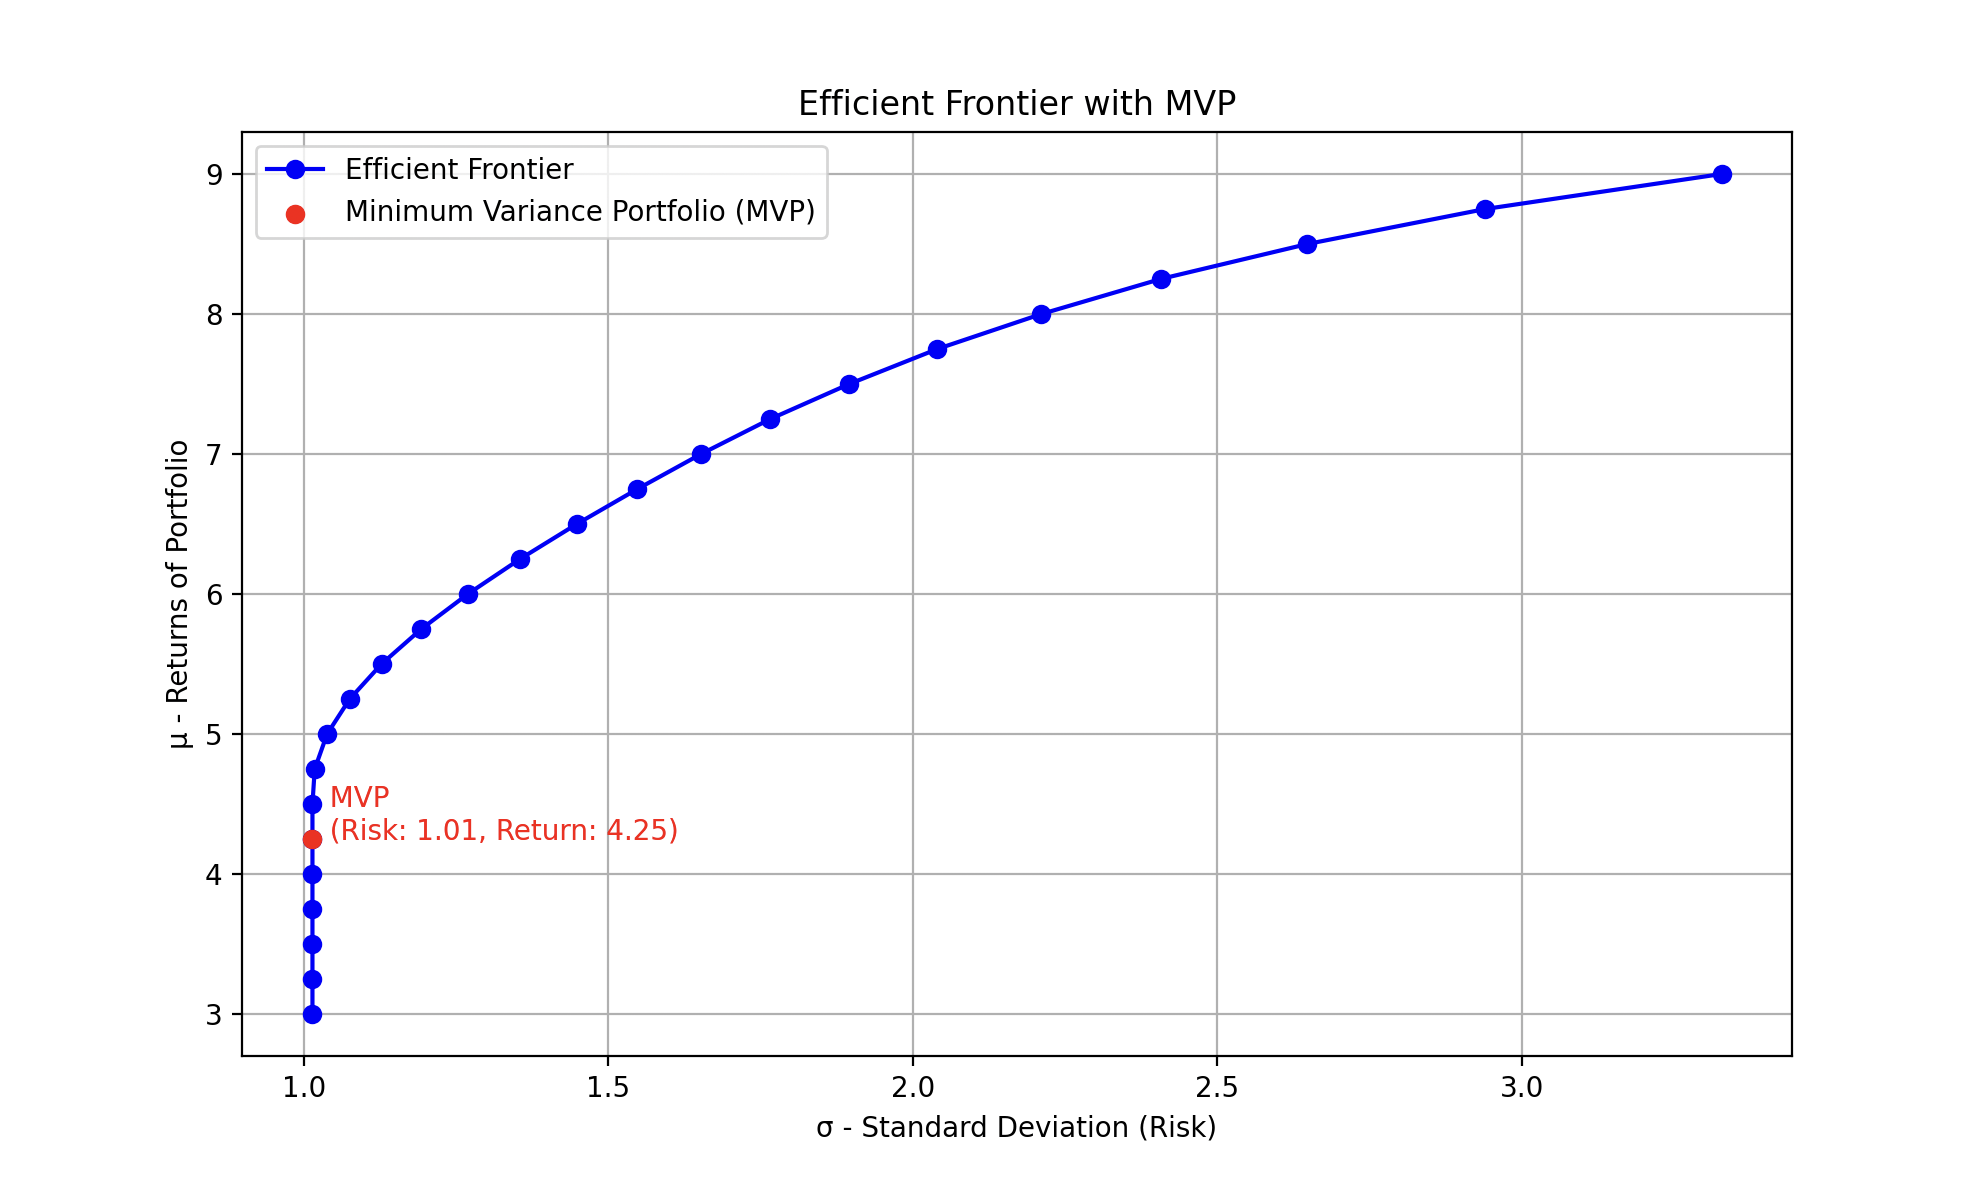

## Image Explaination <br> 
The x-axis represents the risk (standard deviation, σ) of the portfolio, and the y-axis represents the expected return (μ) of the portfolio.
The blue line, labeled “Efficient Frontier”, represents portfolios that offer the highest expected return for a given level of risk. Each point on this line represents a different portfolio.
The red dot, labeled “MVP”, represents the Minimum Variance Portfolio, which is the portfolio with the lowest risk among all possible portfolios. In this case, the MVP has a risk of 1.01 and a return of 4.25%.

Compared to the plot from Task 1, this plot extends further to the right. This is because the constraint for the expected return has been changed from an equality constraint to an inequality constraint, allowing for portfolios with a return greater than r. These portfolios include savings, which reduce the overall risk of the portfolio.
<br> <br>

# 4th Method <br>

In first method, the constraint x≥0 <br>
It ensures that the weights of the assets in the portfolio are non-negative. This means that we can only go long on the assets, i.e., we can only buy the assets. <br> <br>
In this method, we are allowed to short-sell the assets. Short selling is a practice where we borrow assets and sell them with the hope that the price will decrease in the future. we then buy back the assets at a lower price and return them to the lender, making a profit from the price difference. This can be modelled by removing the constraint x≥0

This allows the weights of the assets to be negative, which represents short selling.

The change in the constraint will affect the shape of the efficient frontier. 
Firstly, the efficient frontier is a curve that starts from the minimum variance portfolio and extends upwards. But here, the efficient frontier can potentially be a straight line, indicating that we can achieve any level of return depending on our risk tolerance. This is because by allowing short selling, we can theoretically construct a portfolio with any desired risk and return.

# Code Explaination

The overall code including declarations, definitions, functions and plottings will be the same as Task 1. The only difference will be in removing the non-negativity constraints for the portfolio weights. <br> <br>
In **Optimization for each return** part, we will remove the *non-negativity constraints using list comprehension* <br>
```python
    [model.addConstr(x[j] >= 0, f'non_negativity_{j}') for j in range(num_stocks)]
```
<br>
By removing this line we are allowed to sell first and then buy
<br> <br>

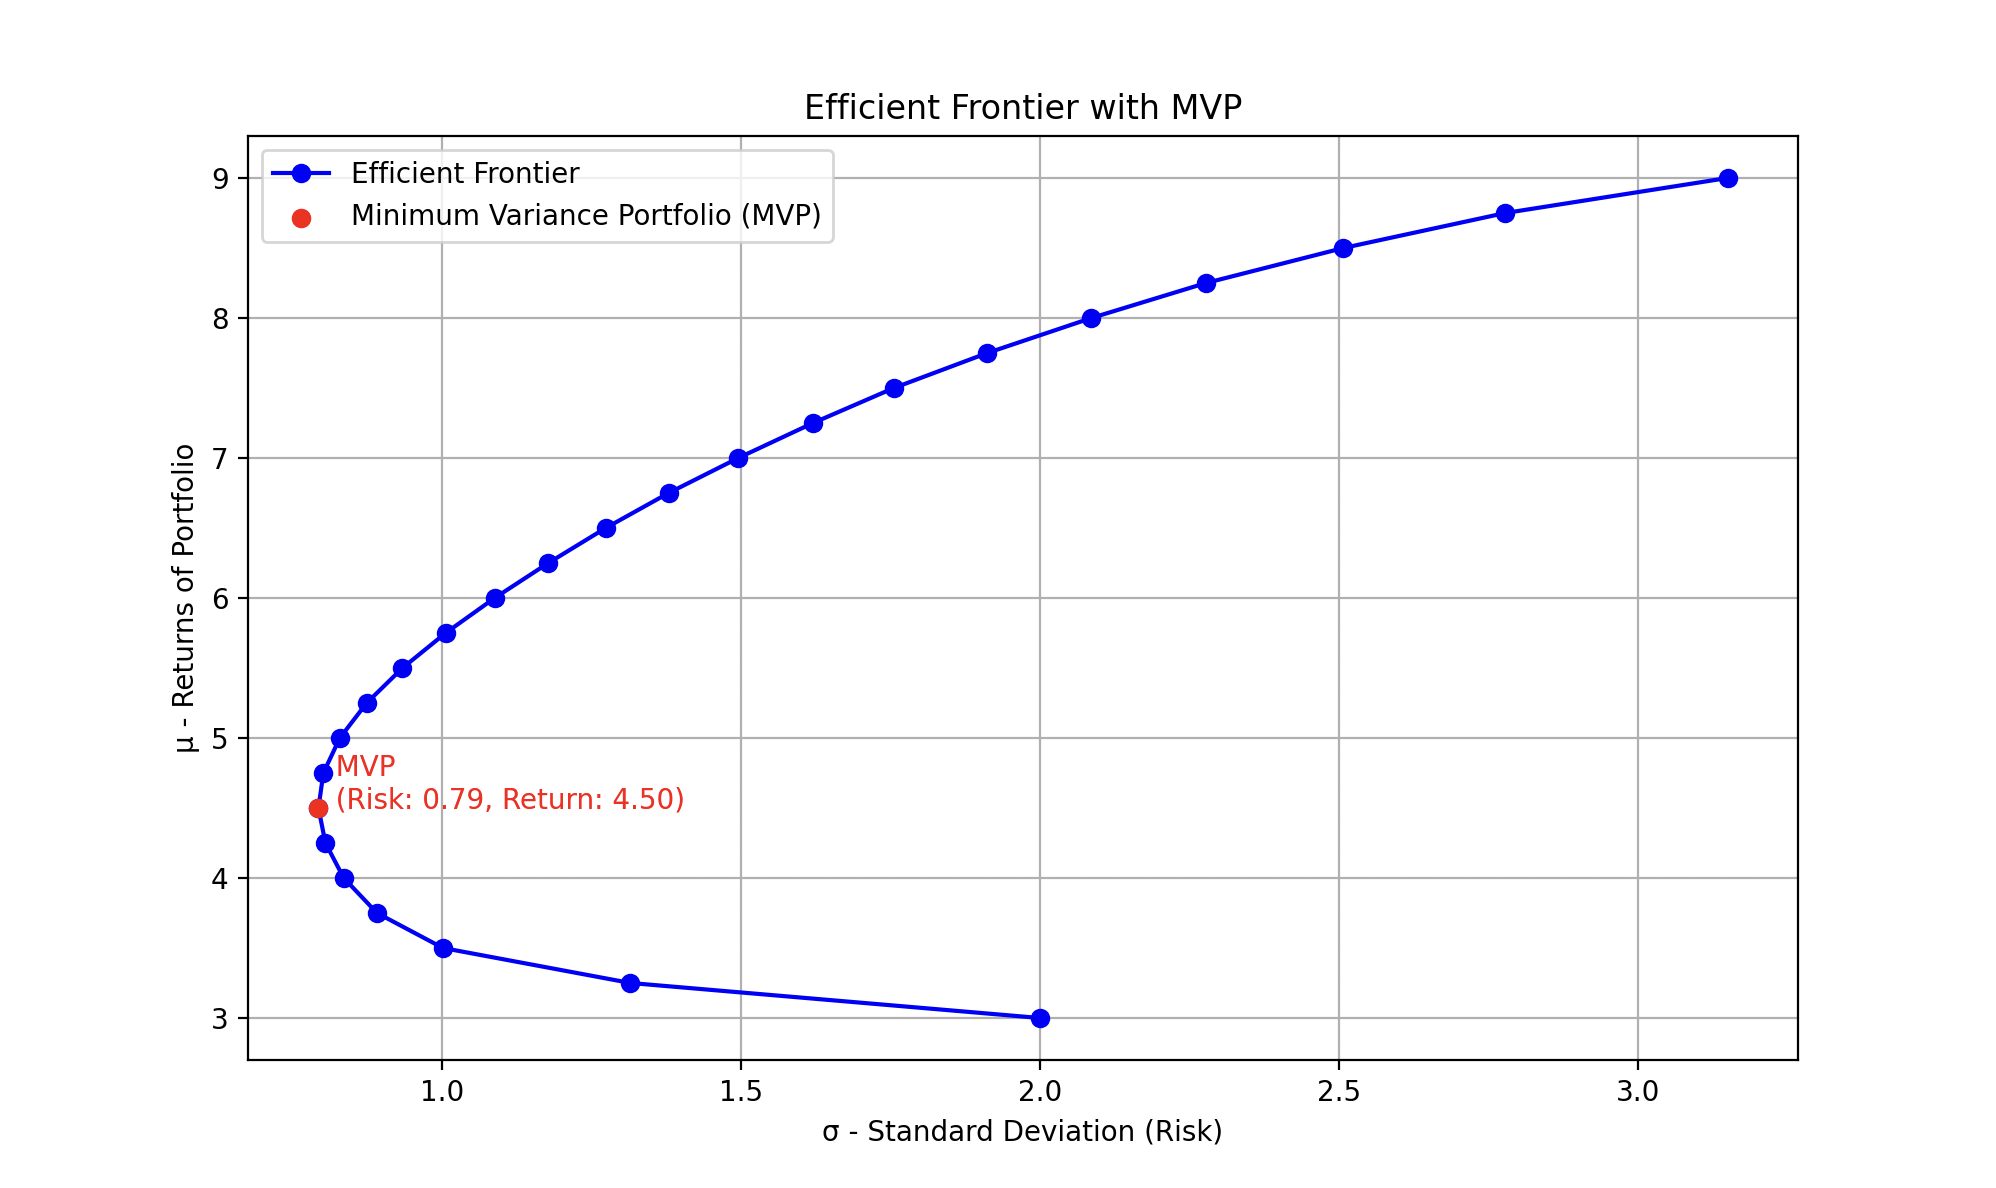

## Image Explaination <br> 
The x-axis represents the risk (standard deviation, σ) of the portfolio, and the y-axis represents the expected return (μ) of the portfolio.
The blue line, labeled “Efficient Frontier”, represents portfolios that offer the highest expected return for a given level of risk. Each point on this line represents a different portfolio.

The red dot, labeled “MVP”, represents the Minimum Variance Portfolio, which is the portfolio with the lowest risk among all possible portfolios. In this case, the MVP has a risk of 0.79 and a return of 4.50%.

Compared to the plot from Task 1, this plot extends further to the right. This is because the constraint for the expected return has been changed from an equality constraint to an inequality constraint, allowing for portfolios with a return greater than r. These portfolios include savings, which reduce the overall risk of the portfolio.